In [144]:
%load_ext autoreload
%autoreload 2
import mantis_core.rock_physics as manRP
import mantis_core.rock_physics.fluid as manFL
import mantis_core.interface as manIT
import mantis_core._literature as manLIT
from mantis_core.rock_physics.fluid_presets import presets as manPResets
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Isotropic example: Wang geophysics 1999

In [154]:
from avo_backend.run_examples import plotting, generate_data, init_plot, close_plot

resolution: int = 128
s0 = np.linspace(0.0, 0.25, resolution)
s1 = np.linspace(0.0, 0.15, resolution)
paper = "Wang, geophysics-1999"
pairs = (
    ("shale", "sand"),
    ("shale", "limestone"),
    ("anhydrite", "sand"),
    ("anhydrite", "limestone"),
)
data = {
    f"{pair[0]}-{pair[1]}": (
        generate_data(paper=paper, pairs=pair, s_axis=s0)
        if pair[0] != "anhydrite"
        else generate_data(paper=paper, pairs=pair, s_axis=s1)
    )
    for pair in pairs
}

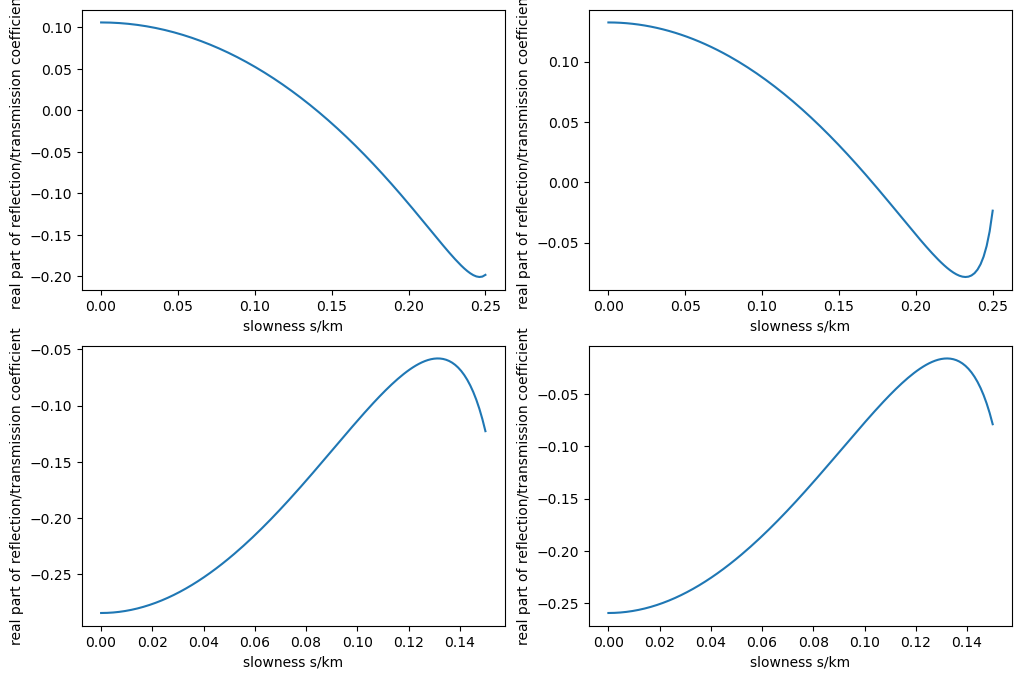

In [146]:
fig, ax = init_plot(2, 2, title="Wang, geophysics-1999")

ax[0, 0].plot(s0, data["shale-sand"][:, 0, 0, 0].T)
ax[0, 1].plot(s0, data["shale-limestone"][:, 0, 0, 0].T)
ax[1, 0].plot(s1, data["anhydrite-sand"][:, 0, 0, 0].T)
ax[1, 1].plot(s1, data["anhydrite-limestone"][:, 0, 0, 0].T)
close_plot(fig)

<img src="./avo_backend/figures/Screenshot%202024-02-22%20at%2023.22.16.png">

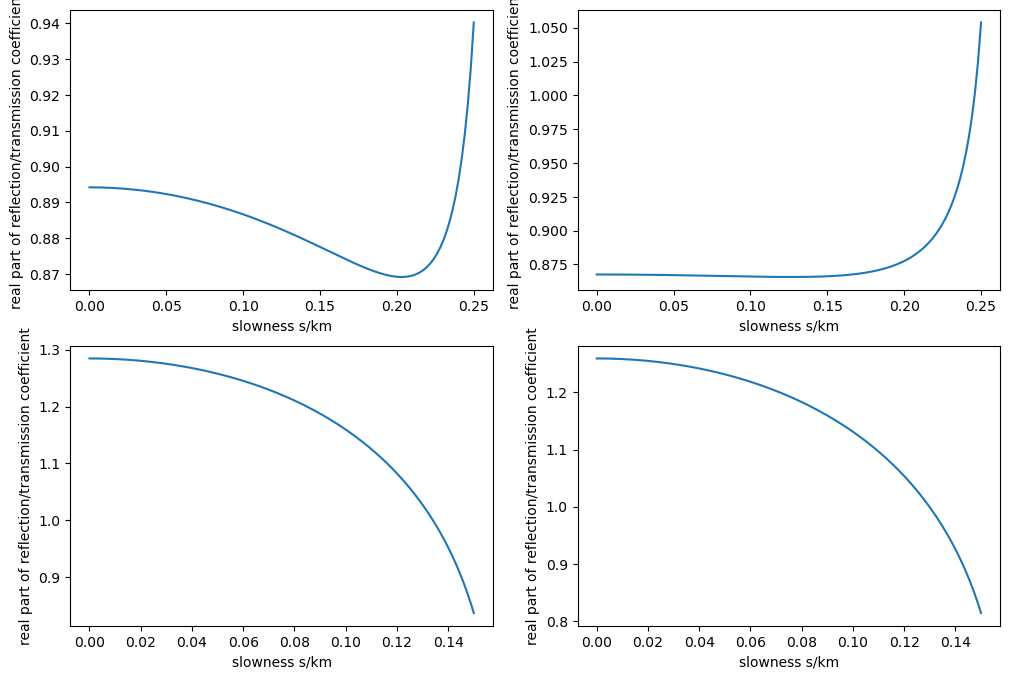

In [147]:
fig, ax = init_plot(2, 2, title="Wang, geophysics-1999")

ax[0, 0].plot(s0, data["shale-sand"][:, 1, 0, 0].T)
ax[0, 1].plot(s0, data["shale-limestone"][:, 1, 0, 0].T)
ax[1, 0].plot(s1, data["anhydrite-sand"][:, 1, 0, 0].T)
ax[1, 1].plot(s1, data["anhydrite-limestone"][:, 1, 0, 0].T)
close_plot(fig)

<img src="./avo_backend/figures/Screenshot%202024-02-22%20at%2023.22.23.png">


# Anisotropic example: Jin & Stovas 2019

In [156]:
paper = "Jin & Stovas, geophysics-2019"
pairs = (("medium-1", "medium-2"), ("medium-3", "medium-4"))
s0 = np.linspace(0.0, 0.35, resolution)

azimuthal_angles = (0.0, np.pi / 6.0, np.pi / 2.0, 2.0 * np.pi / 3.0)
labels = ["φ = 0", "φ = π/6", "φ = π/2", "φ = 2π/3"]
labels2 = ["P-P", "P-S", "P-T"]


# Generic example

In [54]:
import mantis_core.utilities as manU
top_properties = {"Vp": 3.0, "Vs": 1.5, "Rho": 2.4}
bot_properties = {"Vp": 3.5, "Vs": 1.7, "Rho": 2.6}

layer1 = manIT.SchoenbergProtazio(
    Cij=manU.VtoCij(**top_properties),
    density=top_properties["Rho"],
)
layer2 = manIT.SchoenbergProtazio(
    Cij=manU.VtoCij(**bot_properties),
    density=bot_properties["Rho"],
)
rt =  manIT.ReflectionTransmissionMatrix.sp_init(spUp=layer1, spDown=layer2)
reflection, transmission = rt(horizontal_slowness=[0.2,0.0])

In [55]:
with np.printoptions(precision=5, suppress=True):
    print(f"reflection matrix:\n{reflection} \ntransmission matrix:\n{transmission}")

reflection matrix:
[[ 0.1093 -0.j -0.0474 -0.j  0.     +0.j]
 [-0.07951-0.j -0.04582-0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j -0.09518-0.j]] 
transmission matrix:
[[ 0.93249-0.j  0.04443-0.j  0.     +0.j]
 [-0.067  -0.j  0.90457-0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.9382 -0.j]]
